#### Import Modules

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import cross_val_score

import sys
sys.path.append("../")

from scripts.modeling_utils import run_train_pipeline, get_pipeline, dvc_get_data

import os
import mlflow

### Cleaned Data (v2 on dvc)

#### Reading Cleaned Data Version Using DVC

In [2]:
df = dvc_get_data(path='data/AdSmartABdata.csv', 
                version='v2', experiment_name="Cleaned Data")
df = df.drop(columns=['Unnamed: 0'])
df.info()

2022/09/01 09:08:22 INFO mlflow.tracking.fluent: Experiment with name 'Cleaned Data' does not exist. Creating a new experiment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   experiment   1243 non-null   object
 1   hour         1243 non-null   int64 
 2   platform_os  1243 non-null   int64 
 3   browser      1243 non-null   object
 4   day_of_week  1243 non-null   object
 5   brand        1243 non-null   object
 6   response     1243 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 68.1+ KB


#### Logistic Regression on Cleaned Data

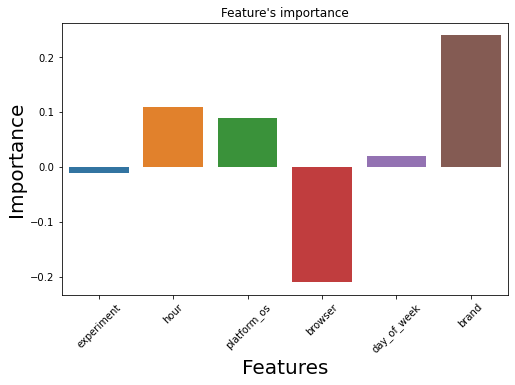

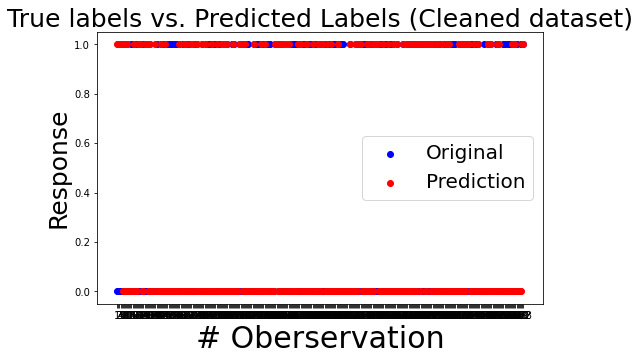

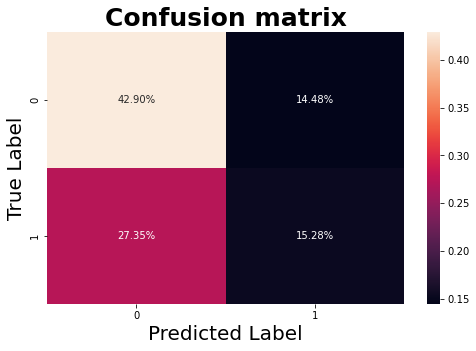

{'accuracy': 0.58, 'precision': 0.51, 'recall': 0.36, 'entropy': 0.68, 'true_pos': 160, 'true_neg': 57, 'false_pos': 54, 'false_neg': 102}
{'experiment': -0.01, 'hour': 0.11, 'platform_os': 0.09, 'browser': -0.21, 'day_of_week': 0.02, 'brand': 0.24}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Cleaned dataset_Logistic regression_Thu-Sep--1-09:11:56-2022'.
2022/09/01 09:12:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Cleaned dataset_Logistic regression_Thu-Sep--1-09:11:56-2022, version 1
Created version '1' of model 'Cleaned dataset_Logistic regression_Thu-Sep--1-09:11:56-2022'.


Run - Logistic regression is logged to Experiment - Cleaned dataset


In [8]:

X = df.drop(columns=['response'])
y = df['response'].values
model = LogisticRegression()
run_train_pipeline(model, X, y, 
                experiment_name='Cleaned dataset',
                run_name='Logistic regression')

mlflow.end_run()

#### RandomForestClassifier on the Cleaned Data 

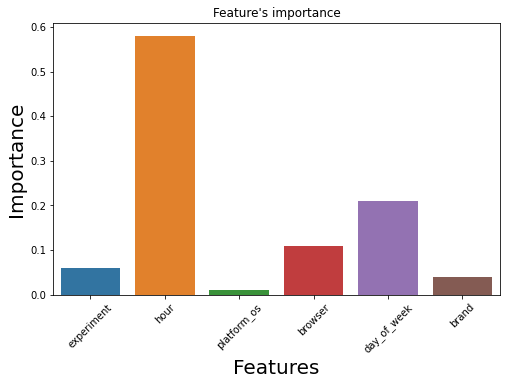

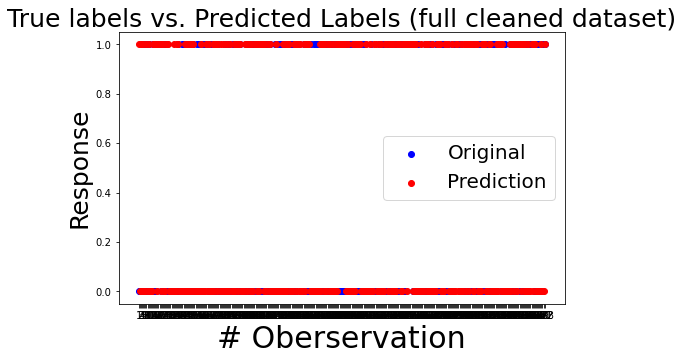

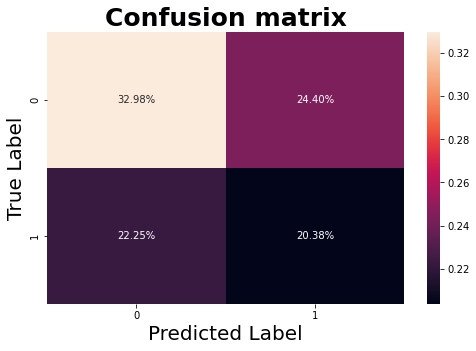

{'accuracy': 0.53, 'precision': 0.46, 'recall': 0.48, 'entropy': 0.87, 'true_pos': 123, 'true_neg': 76, 'false_pos': 91, 'false_neg': 83}
{'experiment': 0.06, 'hour': 0.58, 'platform_os': 0.01, 'browser': 0.11, 'day_of_week': 0.21, 'brand': 0.04}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


/home/n/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'full cleaned dataset_depth 20 random forest_Thu-Sep--1-09:10:06-2022'.
2022/09/01 09:10:32 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: full cleaned dataset_depth 20 random forest_Thu-Sep--1-09:10:06-2022, version 1
Created version '1' of model 'full cleaned dataset_depth 20 random forest_Thu-Sep--1-09:10:06-2022'.


Run - depth 20 random forest is logged to Experiment - full cleaned dataset


In [6]:
model = RandomForestClassifier(max_depth=20)
run_train_pipeline(model, X, y, 
                experiment_name='full cleaned dataset',
                run_name='depth 20 random forest')
mlflow.end_run()

#### XGBoost on the Cleaned Data

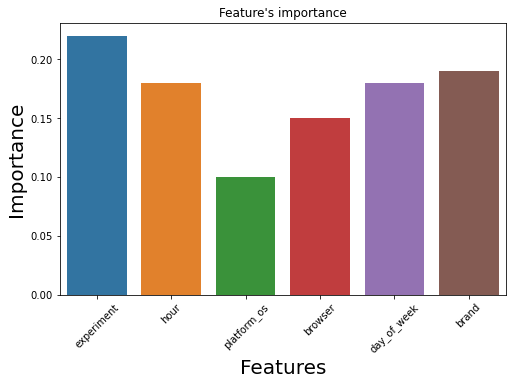

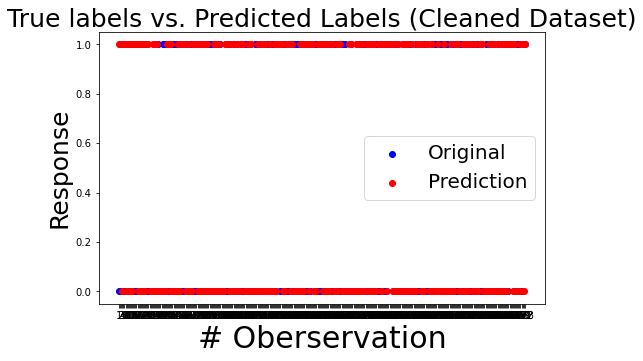

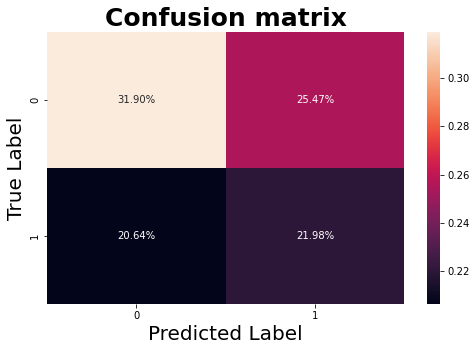

{'accuracy': 0.54, 'precision': 0.46, 'recall': 0.52, 'entropy': 0.86, 'true_pos': 119, 'true_neg': 82, 'false_pos': 95, 'false_neg': 77}
{'experiment': 0.22, 'hour': 0.18, 'platform_os': 0.1, 'browser': 0.15, 'day_of_week': 0.18, 'brand': 0.19}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Cleaned Dataset_XGBoost Classifier_Thu-Sep--1-09:11:07-2022'.
2022/09/01 09:11:13 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Cleaned Dataset_XGBoost Classifier_Thu-Sep--1-09:11:07-2022, version 1
Created version '1' of model 'Cleaned Dataset_XGBoost Classifier_Thu-Sep--1-09:11:07-2022'.


Run - XGBoost Classifier is logged to Experiment - Cleaned Dataset


In [7]:
model = XGBClassifier()
run_train_pipeline(model, X, y, 
                experiment_name='Cleaned Dataset',
                run_name='XGBoost Classifier')
mlflow.end_run()


### Applying ML Algorithms for Versioned Data Based on Browser 

#### Chrome Mobile (v3 on dvc)

In [10]:
df = dvc_get_data(path='data/AdSmartABdata.csv', 
                version='v3', experiment_name="Chrome Mobile")
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   experiment   695 non-null    object
 1   hour         695 non-null    int64 
 2   platform_os  695 non-null    int64 
 3   browser      695 non-null    object
 4   day_of_week  695 non-null    object
 5   brand        695 non-null    object
 6   response     695 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 38.1+ KB


#### Logistic Regression on Browser Chrome Mobile  

In [13]:
try:
    mlflow.end_run()
except:
    pass

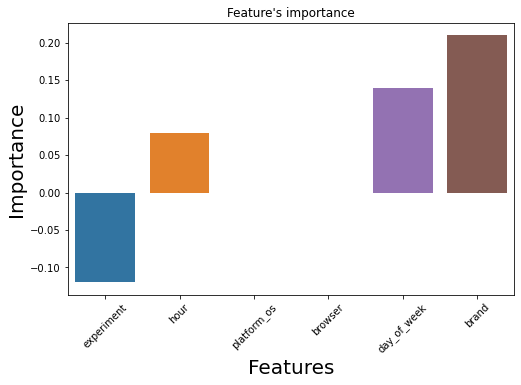

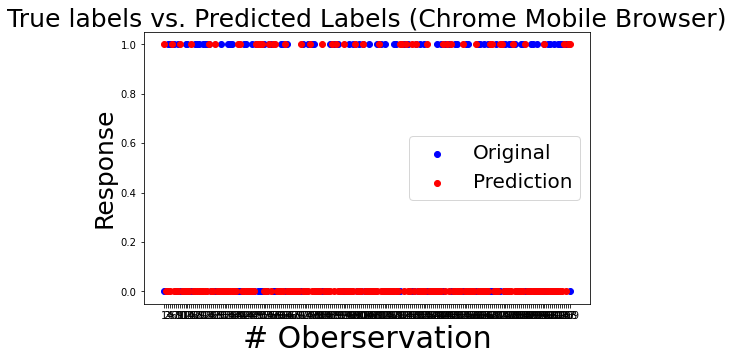

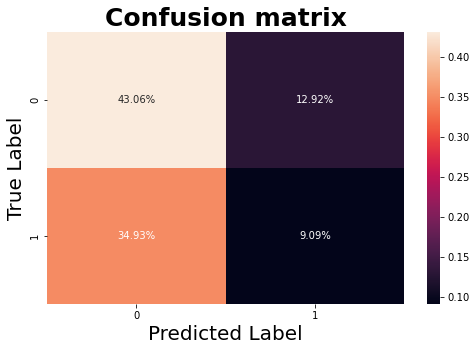

{'accuracy': 0.52, 'precision': 0.41, 'recall': 0.21, 'entropy': 0.7, 'true_pos': 90, 'true_neg': 19, 'false_pos': 27, 'false_neg': 73}
{'experiment': -0.12, 'hour': 0.08, 'platform_os': 0.0, 'browser': 0.0, 'day_of_week': 0.14, 'brand': 0.21}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Chrome Mobile Browser_Logistic regression_Thu-Sep--1-09:27:31-2022'.
2022/09/01 09:27:37 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Chrome Mobile Browser_Logistic regression_Thu-Sep--1-09:27:31-2022, version 1
Created version '1' of model 'Chrome Mobile Browser_Logistic regression_Thu-Sep--1-09:27:31-2022'.


Run - Logistic regression is logged to Experiment - Chrome Mobile Browser


In [14]:
X = df.drop(columns=['response'])
y = df['response'].values
model = LogisticRegression()
run_train_pipeline(model, X, y, 
                experiment_name='Chrome Mobile Browser',
                run_name='Logistic regression')

mlflow.end_run()

#### RandomForestClassifier on Browser Chrome Mobile 

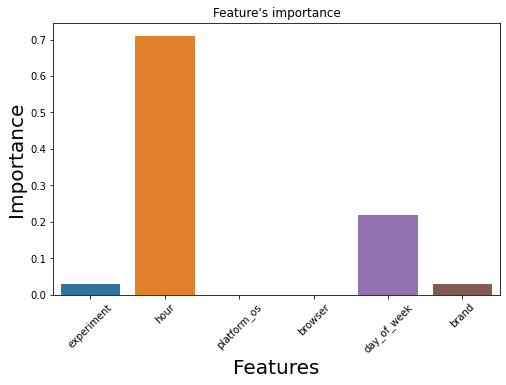

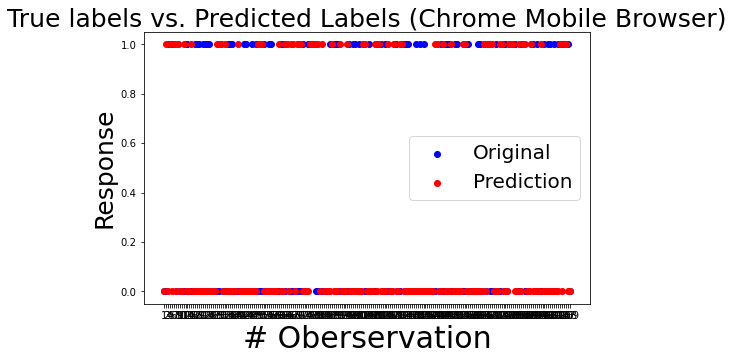

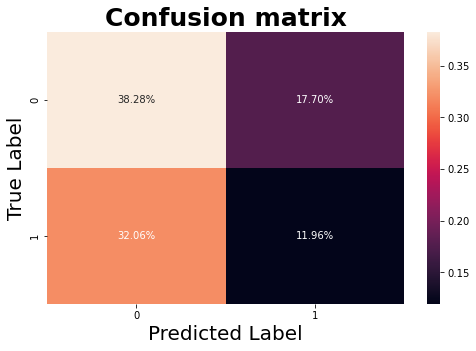

{'accuracy': 0.5, 'precision': 0.4, 'recall': 0.27, 'entropy': 1.05, 'true_pos': 80, 'true_neg': 25, 'false_pos': 37, 'false_neg': 67}
{'experiment': 0.03, 'hour': 0.71, 'platform_os': 0.0, 'browser': 0.0, 'day_of_week': 0.22, 'brand': 0.03}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Chrome Mobile Browser_depth 20 random forest_Thu-Sep--1-09:29:03-2022'.
2022/09/01 09:29:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Chrome Mobile Browser_depth 20 random forest_Thu-Sep--1-09:29:03-2022, version 1
Created version '1' of model 'Chrome Mobile Browser_depth 20 random forest_Thu-Sep--1-09:29:03-2022'.


Run - depth 20 random forest is logged to Experiment - Chrome Mobile Browser


In [15]:
model = RandomForestClassifier(max_depth=20)
run_train_pipeline(model, X, y, 
                experiment_name='Chrome Mobile Browser',
                run_name='depth 20 random forest')
mlflow.end_run()

#### XGBoost on Browser Chrome Mobile

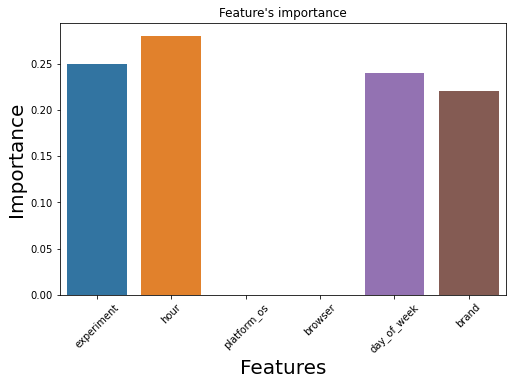

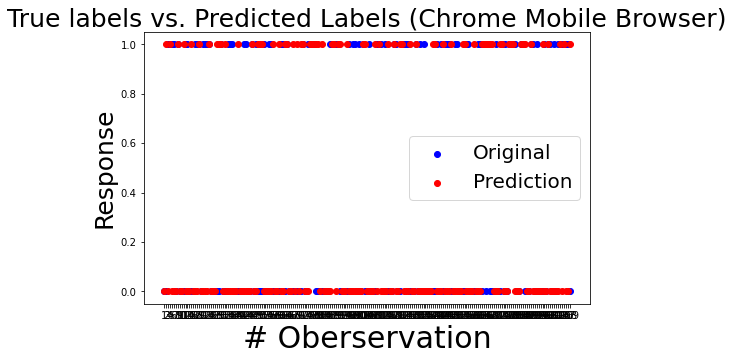

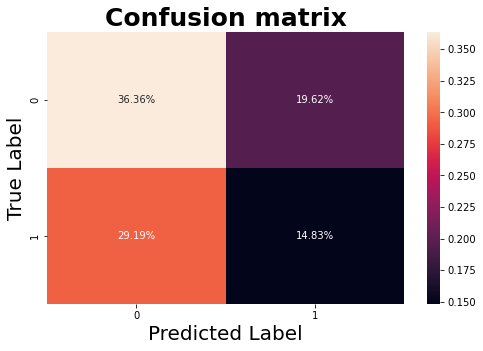

{'accuracy': 0.51, 'precision': 0.43, 'recall': 0.34, 'entropy': 0.85, 'true_pos': 76, 'true_neg': 31, 'false_pos': 41, 'false_neg': 61}
{'experiment': 0.25, 'hour': 0.28, 'platform_os': 0.0, 'browser': 0.0, 'day_of_week': 0.24, 'brand': 0.22}
Run params saved
Run metrics saved
logging figures
figures saved with mlflow
figures saved
Saving artifacts
saving dict


Successfully registered model 'Chrome Mobile Browser_XGBoost Classifier_Thu-Sep--1-09:31:08-2022'.
2022/09/01 09:31:14 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Chrome Mobile Browser_XGBoost Classifier_Thu-Sep--1-09:31:08-2022, version 1
Created version '1' of model 'Chrome Mobile Browser_XGBoost Classifier_Thu-Sep--1-09:31:08-2022'.


Run - XGBoost Classifier is logged to Experiment - Chrome Mobile Browser


In [16]:
model = XGBClassifier()
run_train_pipeline(model, X, y, 
                experiment_name='Chrome Mobile Browser',
                run_name='XGBoost Classifier')
mlflow.end_run()
